In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 




sns.set()

In [2]:
df = pd.read_csv('C:/Users/User/Desktop/airline_passenger_satisfaction.csv', index_col ='ID')
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
df.info()

In [ ]:
df['Arrival Delay'].fillna(0,inplace=True)
df['Arrival Delay'].isnull().sum()

In [ ]:
df['Class'].unique()

In [ ]:
df['Type of Travel'].unique()

In [ ]:
df['Customer Type'].unique()

In [ ]:
df['Satisfaction'].unique()

In [ ]:
df['Gender'].value_counts()

In [ ]:
df['Satisfaction'].value_counts()

In [15]:
sex_p =  df.Gender.value_counts().astype('int64')
sex_p.values

array([65899, 63981], dtype=int64)

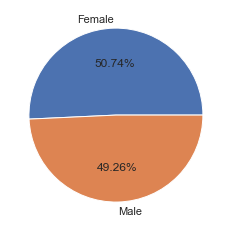

In [52]:
plt.pie(sex_p.values, labels = sex_p.index, autopct = '%1.2f%%')
plt.show()

In [17]:
# Unique Gender Count
Male = len(df[df['Gender']=='Male'])
Female = len(df[df['Gender']=='Female'])

sex_label = ['Male','Female'] 
sex_data = [Male,Female]
sex = pd.DataFrame(data = sex_data,index=sex_label,columns =['Counts'])

sex
# can also be done like this 
# sex_p=  df.Gender.value_counts()
# plt.pie(sex_p, sex.index, autopct = '%1.2f%')

,Counts
Male,63981
Female,65899


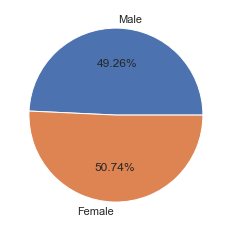

In [53]:
#pie chart for Gender counts
plt.pie(sex_data,labels=['Male','Female'], autopct='%1.2f%%')
plt.show()

In [46]:
# Customer type Value Counts
Customer_Type = pd.DataFrame(df['Customer Type'].value_counts())
Customer_Type

,Customer Type
Returning,106100
First-time,23780


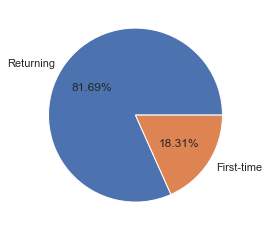

In [51]:
plt.pie(Customer_Type['Customer Type'],labels = Customer_Type.index , autopct = '%1.2f%%')
plt.show()

In [59]:
# Type of travel count 
Type_of_Travel = df['Type of Travel'].value_counts()
Type_of_Travel.values

array([89693, 40187], dtype=int64)

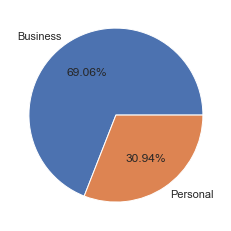

In [61]:
# visualize the Type of Travel for the Airline 
plt.pie(Type_of_Travel.values, labels= Type_of_Travel.index, autopct = '%1.2f%%')

plt.show()

In [20]:
# satisfaction counts for by gender and Class
groupby_satisfaction = df.groupby('Satisfaction')[['Gender','Class']]
satis_by_class_gender =  pd.DataFrame(groupby_satisfaction.value_counts())
satis_by_class_gender.reset_index(inplace=True)
satis_by_class_gender.rename(columns={0:'Counts'},inplace=True)

satis_by_class_gender

,Satisfaction,Gender,Class,Counts
0,Neutral or Dissatisfied,Female,Economy,24171
1,Neutral or Dissatisfied,Male,Economy,23195
2,Neutral or Dissatisfied,Female,Business,9663
3,Neutral or Dissatisfied,Male,Business,9331
4,Neutral or Dissatisfied,Female,Economy Plus,3796
5,Neutral or Dissatisfied,Male,Economy Plus,3296
6,Satisfied,Female,Business,21600
7,Satisfied,Male,Business,21566
8,Satisfied,Female,Economy,5499
9,Satisfied,Male,Economy,5444


<AxesSubplot:xlabel='Gender', ylabel='Counts'>

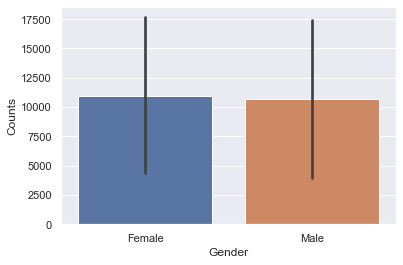

In [21]:
sns.barplot(data=satis_by_class_gender,x= 'Gender',y='Counts')

In [22]:
sat_female_class_counts  = satis_by_class_gender[satis_by_class_gender['Gender'] == 'Female']
sat_female_Business_counts = sat_female_class_counts[sat_female_class_counts['Class'] == 'Business']
sat_female_Ecoplus_counts = sat_female_class_counts[sat_female_class_counts['Class'] == 'Economy Plus']
sat_female_Eco_counts = sat_female_class_counts[sat_female_class_counts['Class'] == 'Economy']


sat_male_class_counts  = satis_by_class_gender[satis_by_class_gender['Gender'] == 'Male']
sat_male_Business_counts = sat_male_class_counts[sat_male_class_counts['Class'] == 'Business']
sat_male_Ecoplus_counts = sat_male_class_counts[sat_male_class_counts['Class'] == 'Economy Plus']
sat_male_Eco_counts = sat_male_class_counts[sat_male_class_counts['Class'] == 'Economy']
sat_female_Business_counts 

sat_class_gender = satis_by_class_gender[satis_by_class_gender['Satisfaction'] == 'Satisfied']
dis_class_gender = satis_by_class_gender[satis_by_class_gender['Satisfaction'] == 'Neutral or Dissatisfied']


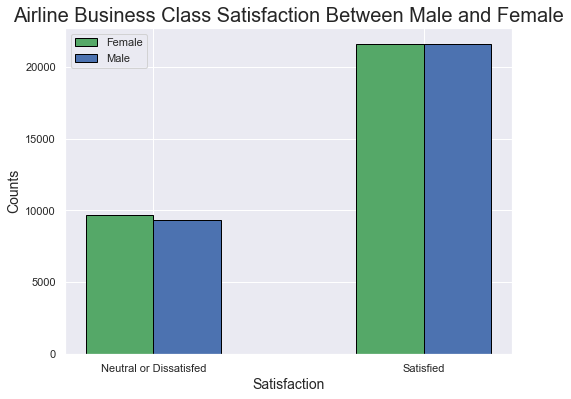

In [23]:
n = len(sat_female_Business_counts['Counts'])
r = np.arange(n)
width = 0.25
plt.figure(figsize = (8,6))
plt.bar(r,sat_female_Business_counts['Counts'], color='g',
       width = width, edgecolor = 'black',label='Female')
plt.bar(r + width,sat_male_Business_counts['Counts'], color='b',
       width = width, edgecolor = 'black',label='Male')

plt.xlabel('Satisfaction',fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Airline Business Class Satisfaction Between Male and Female',fontsize = 20)

plt.xticks(r + width/2,['Neutral or Dissatisfed','Satisfied'])
plt.legend()

plt.show()

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

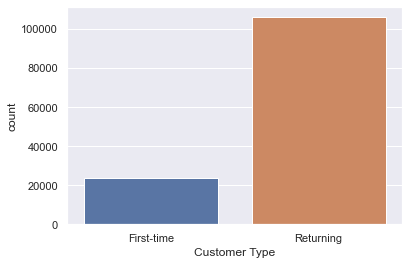

In [24]:
sns.countplot(data = df, x='Customer Type')

In [25]:
customer_foods =  pd.DataFrame(df.groupby('Customer Type')['Food and Drink'].value_counts())
customer_foods.rename(columns={'Food and Drink': 'Counts'},inplace=True)
customer_foods.reset_index(inplace=True)
customer_foods_first_timers = customer_foods[customer_foods['Customer Type'] == 'First-time']
customer_foods_Returning = customer_foods[customer_foods['Customer Type'] == 'Returning']
customer_foods_first_timers['Counts'],customer_foods_Returning['Counts']

(0    5008
 1    4954
 2    4882
 3    4710
 4    4194
 5      32
 Name: Counts, dtype: int64,
 6     25555
 7     23247
 8     22840
 9     22501
 10    11857
 11      100
 Name: Counts, dtype: int64)

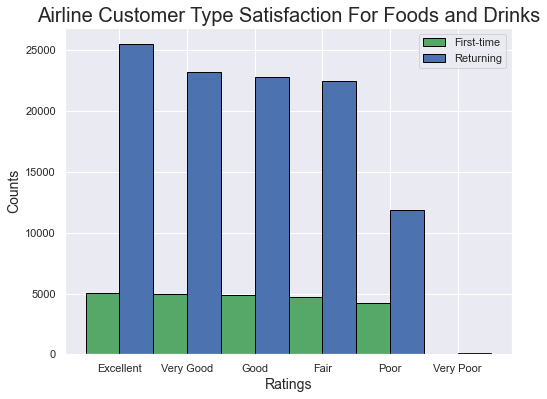

In [30]:
n = len(customer_foods_first_timers['Counts'])
r = np.arange(n)
width = 0.25

plt.figure(figsize=(8,6))
plt.bar(r,customer_foods_first_timers['Counts'], color='g',
       width = width, edgecolor = 'black',label='First-time')
plt.bar(r + width,customer_foods_Returning['Counts'], color='b',
       width = width, edgecolor = 'black',label='Returning')

                                           
                                           
plt.xlabel('Ratings',fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Airline Customer Type Satisfaction For Foods and Drinks',fontsize = 20)

plt.xticks(r+ width/2,['Excellent','Very Good','Good','Fair','Poor','Very Poor'])
plt.legend()
                                           

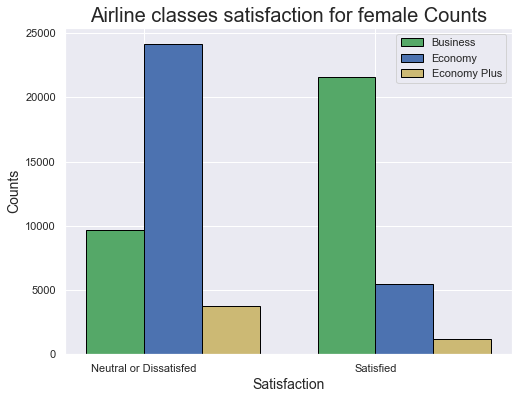

In [27]:
n = 2
r = np.arange(n)
width = 0.25
plt.figure(figsize = (8,6))
plt.bar(r,sat_female_Business_counts['Counts'], color='g',
       width = width, edgecolor = 'black',label='Business')
plt.bar(r + width,sat_female_Eco_counts['Counts'], color='b',
       width = width, edgecolor = 'black',label='Economy')
plt.bar(r + width + width,sat_female_Ecoplus_counts['Counts'], color='y',
       width = width, edgecolor = 'black',label='Economy Plus')

plt.xlabel('Satisfaction',fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Airline classes satisfaction for female Counts',fontsize = 20)

plt.xticks(r + width/2,['Neutral or Dissatisfed','Satisfied'])
plt.legend()

plt.show()

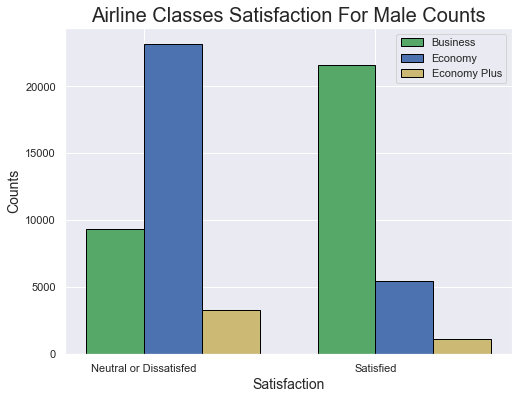

In [28]:
n = 2
r = np.arange(n)
width = 0.25
plt.figure(figsize = (8,6))
plt.bar(r,sat_male_Business_counts['Counts'], color='g',
       width = width, edgecolor = 'black',label='Business')
plt.bar(r + width,sat_male_Eco_counts['Counts'], color='b',
       width = width, edgecolor = 'black',label='Economy')
plt.bar(r + width + width, sat_male_Ecoplus_counts['Counts'], color='y',
       width = width, edgecolor = 'black',label='Economy Plus')

plt.xlabel('Satisfaction',fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Airline Classes Satisfaction For Male Counts',fontsize = 20)

plt.xticks(r + width/2,['Neutral or Dissatisfed','Satisfied'])
plt.legend()

plt.show()